# Re-analysis of a microarray gene expression data set

# 1 Introduction

The goal of this notebook is to reanalyze a published microarray data set.  Here, we will use data from [this study](http://www.ncbi.nlm.nih.gov/pubmed/19732725), which contains data on pancreatic cancer samples.  We will first reproduce the corresponding figure in the paper, then perform some exploratory data analysis.


## 2 Prepare libraries and environment

### 2.1 Install any missing libraries

If you get any errors with "require" statements before, then add commands to install libraries here.  If you are using the Scripps central jupyterhub server, then you may need to contact JC Ducom (jcducom@scripps.edu).

In [32]:
source("https://bioconductor.org/biocLite.R")
biocLite(c("mygene"))


ERROR: Error in file(filename, "r", encoding = encoding): https:// URLs are not supported


## 3 Retrieve and prepare data 
### 3.1 Retrieve data from NCBI GEO

[NCBI GEO](http://www.ncbi.nlm.nih.gov/geo/a) is one of the primary repositories for gene expression data.  In this step, you are contacting the GEO server to download data for `GDS4102`, the data set ID for the pancreatic tumor data set we are studying.

In [33]:
require(GEOquery)
gds <- getGEO("GDS4102")

Using locally cached version of GDS4102 found here:
/scratch/RtmpryObVk/GDS4102.soft.gz 


### 3.2 Extract data matrix

The data matrix that the authors deposited will be read into the variable `dat` -- each row is a probeset ID (generally corresponding to one transcript), and each column is a sample.

Many warnings are produced -- we will santiy check below to make sure these warnings are not consequential.

In [34]:
eset <- GDS2eSet(gds)
print(eset)

Using locally cached version of GPL570 found here:
/scratch/RtmpryObVk/GPL570.annot.gz 
Warning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned an internal errorWarning message:
In readLines(con, 1): seek on a gzfile connection returned

ExpressionSet (storageMode: lockedEnvironment)
assayData: 54675 features, 52 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM414924 GSM414925 ... GSM414975 (52 total)
  varLabels: sample tissue description
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (54675 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 19732725 
Annotation:  


### 3.3 Sanity check

Look at the `head` of the data matrix and the overall dimensions

In [35]:
dat <- exprs(eset)
head(dat)

,GSM414924,GSM414925,GSM414926,GSM414927,GSM414929,GSM414931,GSM414933,GSM414935,GSM414936,GSM414937,,GSM414942,GSM414947,GSM414953,GSM414955,GSM414957,GSM414963,GSM414966,GSM414970,GSM414972,GSM414975
1007_s_at,1012,1191,1057,698.7,560.3,1110,770,948.7,546.2,643,⋯,548,498.9,232.9,560.2,447.6,612.7,420.4,365.7,380.6,322.9
1053_at,44.32,63.15,63.54,66.59,67.29,93.63,77.88,73.04,112.1,95.3,⋯,65.4,71.52,74.02,72.6,73.91,79.4,73.66,51.55,66.84,34.77
117_at,43.03,59.31,39.21,30.39,49.92,855.2,3550,106.5,55.26,88.26,⋯,30.34,32.82,58.83,169.2,31.44,68.81,19.96,67.9,19.78,28.29
121_at,36.65,70.62,42.58,124.3,50.58,42.23,76.73,67.18,43.74,75,⋯,130,125.7,51.54,53.86,103.7,87.76,225.3,75.36,161.5,160
1255_g_at,4.92,4.88,5.24,5.33,5.01,5.07,5.25,4.83,6.48,5.32,⋯,6.04,5.63,4.74,4.88,6.13,5.19,5.71,5.19,8.6,5.69
1294_at,151,117.7,137.3,72.95,126.2,131.7,94.88,162.8,86.06,140.9,⋯,42.09,71.08,167.8,177,74.44,134.5,33.35,94.97,37.39,54.92


In [36]:
dim(dat)

[1] 54675    52

#### Note: This finding above is very odd -- we have data for 52 samples here, but paper reports 55 samples...

### 3.4 Find the relevant probe set IDs

Here, we use a library called `mygene` to query for the relevant reporters.

In [61]:
require(mygene)
queryGene <- mygene::query(q="FKBP51",species="human")
queryGene$hits


,_id,symbol,name,taxid,entrezgene
1,2288,FKBP4,FK506 binding protein 4,9606,2288
2,2289,FKBP5,FK506 binding protein 5,9606,2289


Confusingly, both `FKBP5` and `FKBP4` match the search term `FKBP51`.  Referencing the paper, it appears that `FKBP5` (Entrez Gene ID 2289) is the correct gene.

We then get information of the `reporter` for this gene entry from `mygene`.

In [62]:
queryGene <- getGene("2289", fields="symbol,entrezgene,reporter")
print(queryGene)

$`_id`
[1] "2289"

$entrezgene
[1] 2289

$reporter
$reporter$`HuEx-1_0`
[1] "2951567" "2951655" "3933039"

$reporter$`HuGene-2_1`
[1] "17018497"

$reporter$`HG-U95B`
[1] "46271_at"

$reporter$`HG-U95Av2`
[1] "34721_at"

$reporter$`HuGene-1_1`
[1] "8070467" "8125919"

$reporter$`HTA-2_0`
[1] "TC06004150.hg.1"

$reporter$`HG-U133_Plus_2`
[1] "204560_at" "224840_at" "224856_at"


$symbol
[1] "FKBP5"



In [65]:
selectedProbeIDs <- queryGene$reporter$`HG-U133_Plus_2`
selectedProbeIDs

[1] "204560_at" "224840_at" "224856_at"

### 3.5 Extract expression data

Given the selectedProbeIDs found above, extract the relevant expression data from the entire data matrix.

In [66]:
selectedDat <- dat[rownames(dat) %in%  selectedProbeIDs,]
selectedDat

,GSM414924,GSM414925,GSM414926,GSM414927,GSM414929,GSM414931,GSM414933,GSM414935,GSM414936,GSM414937,,GSM414942,GSM414947,GSM414953,GSM414955,GSM414957,GSM414963,GSM414966,GSM414970,GSM414972,GSM414975
204560_at,16.48,19.2,16.13,37.49,54.54,13.58,10.41,25.88,84.68,35.44,⋯,205.1,76.89,313.6,330.5,12.53,124.1,18.99,121.6,12.92,31.47
224840_at,579.3,663.3,362.4,971.3,897.4,256.7,216.1,1734,1247,456.7,⋯,2681,3020,2906,2774,501.1,2662,342.4,2683,185.5,311.1
224856_at,145.6,179.9,82.7,274.6,308.7,79.22,40.86,443,388.9,181.6,⋯,1219,815.3,1331,1632,151.7,907.3,176.7,741.6,112,211.8


## 4 Plotting

### 4.1 Scatter plot

There are two main methods for plotting in R.  One is the built-in `plot` command, and one is the `ggplot2` library.  For the first plots, both methods are shown.  Moving forward, you are welcome to use whichever library you choose.

For the first plot, we will simply create a scatter plot corresponding to the first probe set we retrieved.

#### `plot` method

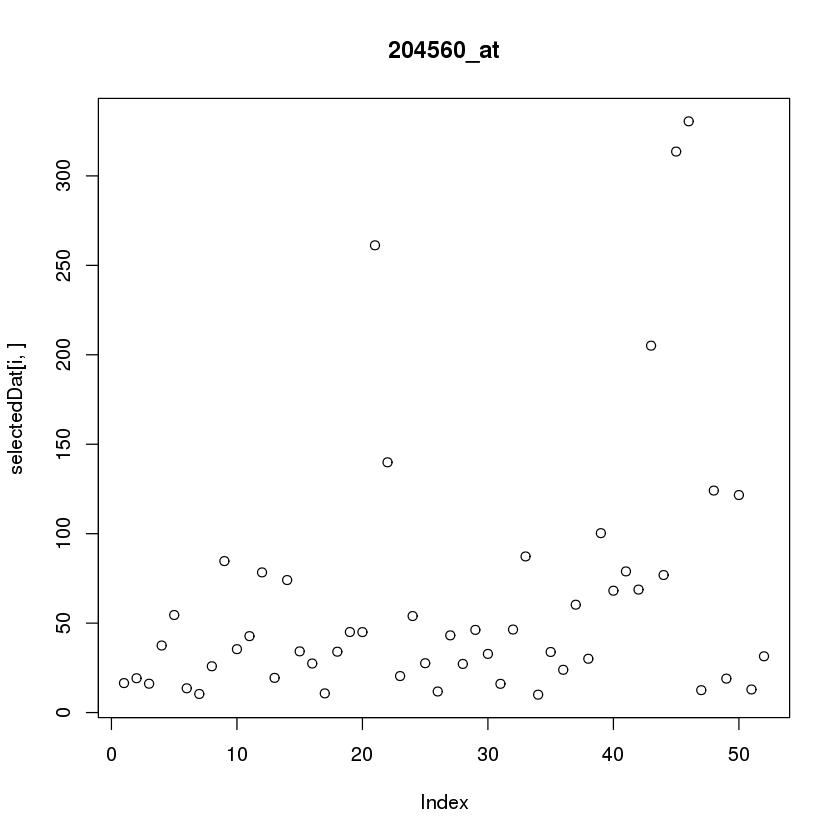

In [67]:
i <- 1
probeID <- rownames(selectedDat)[i]
plot(selectedDat[i,],main=probeID)

#### `ggplot2` method

In [68]:
selectedDatDF <- data.frame(idx=1:(dim(selectedDat)[2]),exp=selectedDat[i,])
head(selectedDatDF)
dim(selectedDatDF)

,idx,exp
GSM414924,1,16.48
GSM414925,2,19.2
GSM414926,3,16.13
GSM414927,4,37.49
GSM414929,5,54.54
GSM414931,6,13.58


[1] 52  2

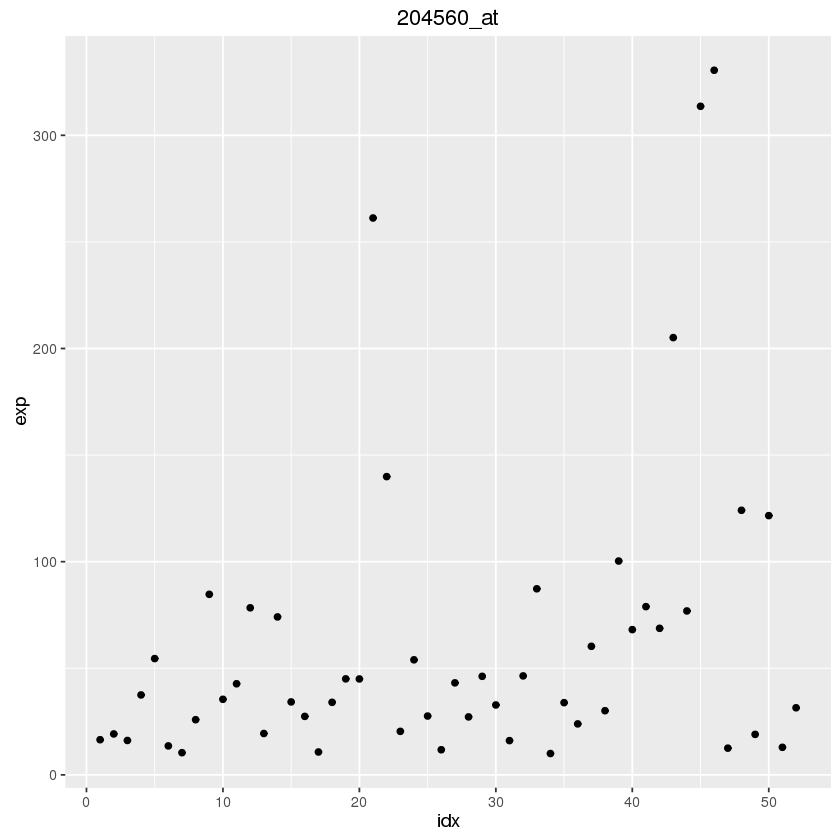

In [69]:
require(ggplot2)

ggplot(selectedDatDF, aes( x = idx, y = exp )) +
geom_point() +
ggtitle(probeID) 

### 4.2 Customizing with color

The plots above aren't particularly useful because we can't see which samples correspond to tumor and which are the normal controls.  Here, we extract the phenotype data (or `pdata`) from our `eset` object.

In [70]:
pData(eset)

,sample,tissue,description
GSM414924,GSM414924,tumor,Value for GSM414924: Pancreatic Sample 6-Tumor; src: PancreaticSample6-Tumor
GSM414925,GSM414925,tumor,Value for GSM414925: Pancreatic Sample 7-Tumor; src: PancreaticSample7-Tumor
GSM414926,GSM414926,tumor,Value for GSM414926: Pancreatic Sample 1-Tumor; src: PancreaticSample1-Tumor
GSM414927,GSM414927,tumor,Value for GSM414927: Pancreatic Sample 16-Tumor; src: PancreaticSample16-Tumor
GSM414929,GSM414929,tumor,Value for GSM414929: Pancreatic Sample 53-Tumor; src: PancreaticSample53-Tumor
GSM414931,GSM414931,tumor,Value for GSM414931: Pancreatic Sample 9-Tumor; src: PancreaticSample9-Tumor
GSM414933,GSM414933,tumor,Value for GSM414933: Pancreatic Sample 11-Tumor; src: PancreaticSample11-Tumor
GSM414935,GSM414935,tumor,Value for GSM414935: Pancreatic Sample 12-Tumor; src: PancreaticSample12-Tumor
GSM414936,GSM414936,tumor,Value for GSM414936: Pancreatic Sample 13-Tumor; src: PancreaticSample13-Tumor
GSM414937,GSM414937,tumor,Value for GSM414937: Pancreatic Sample 54-Tumor; src: PancreaticSample54-Tumor


In [71]:
table(pData(eset)$tissue)


normal  tumor 
    16     36 

#### `plot` method

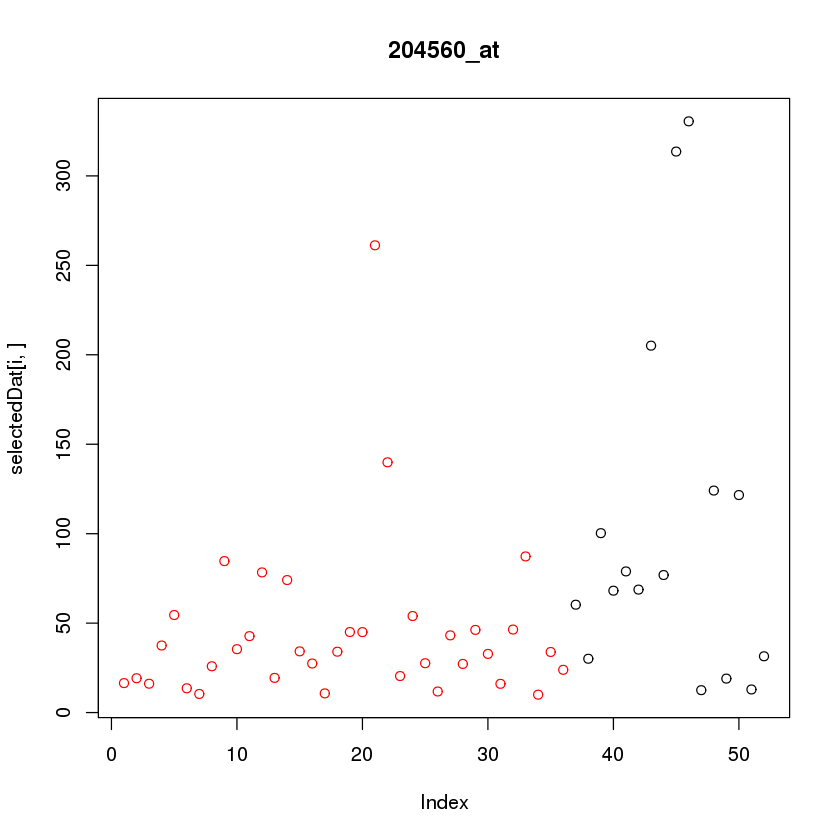

In [72]:
plot(selectedDat[i,],main=probeID,col=pData(eset)$tissue)

#### `ggplot` method

In [73]:
selectedDatDF$tissue <- pData(eset)$tissue
head(selectedDatDF)

,idx,exp,tissue
GSM414924,1,16.48,tumor
GSM414925,2,19.2,tumor
GSM414926,3,16.13,tumor
GSM414927,4,37.49,tumor
GSM414929,5,54.54,tumor
GSM414931,6,13.58,tumor


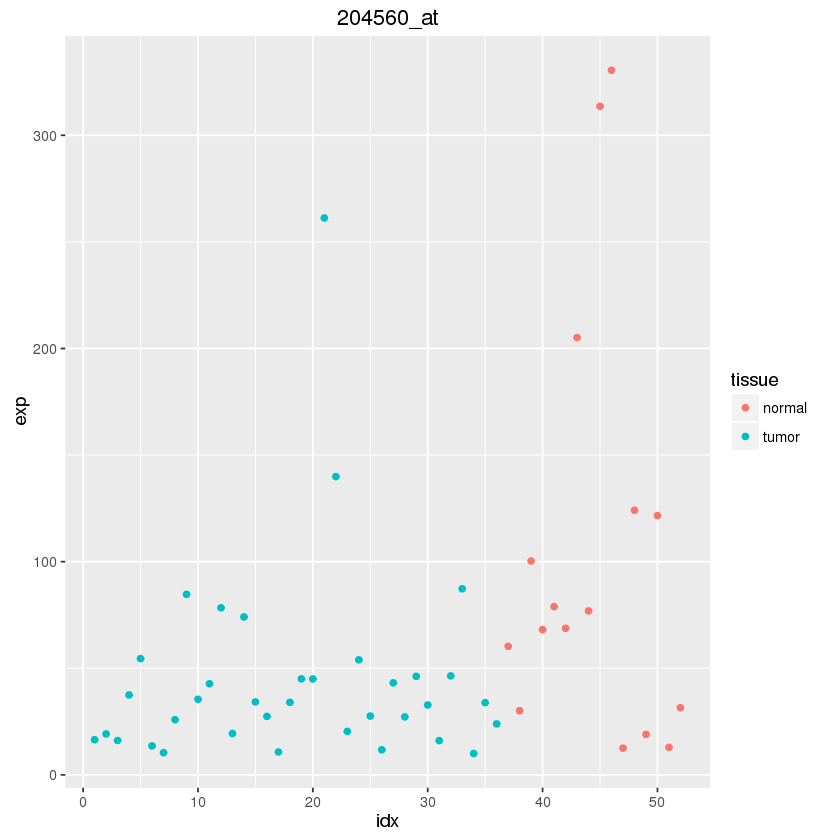

In [74]:
ggplot(selectedDatDF, aes( x = idx, y = exp, colour = tissue )) +
geom_point() +
ggtitle(probeID) 

### 4.3 Barplots

Another way to summarize these data is to use barplots.  (From here, we are only using ``ggplot``.)

The first step is the summarize the data.  This section has intermediate-level transformations using the library `dplyr`.  For the moment, as long as you understand the input and output of this section, don't worry too much about how it's done.

In [75]:
require(dplyr)
grouped = group_by(selectedDatDF,tissue)
selectedDatDFSummarized <- summarize(grouped, mean=mean(exp), sd=sd(exp), n=length(exp))
selectedDatDFSummarized$sem <- selectedDatDFSummarized$sd/sqrt(selectedDatDFSummarized$n)
selectedDatDFSummarized

,tissue,mean,sd,n,sem
1,normal,103.3856,98.85796,16,24.71449
2,tumor,44.62778,45.90044,36,7.650073


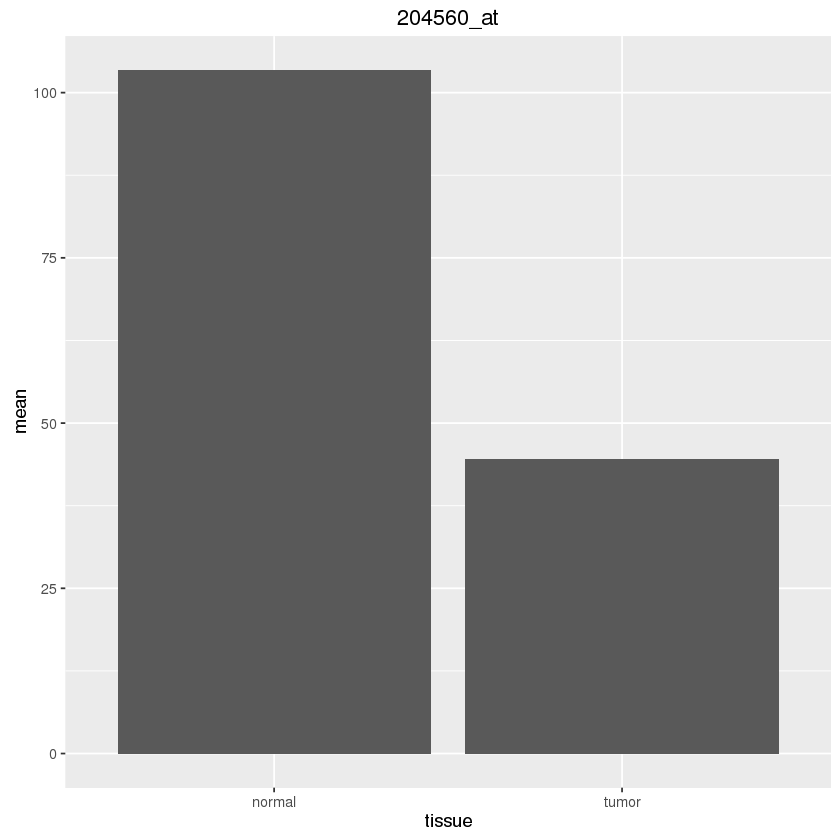

In [76]:
ggplot(selectedDatDFSummarized,aes(x=tissue,y=mean)) + 
  geom_bar(stat="identity") +
  ggtitle(probeID) 

We can also add error bars using `geom_errorbar`:

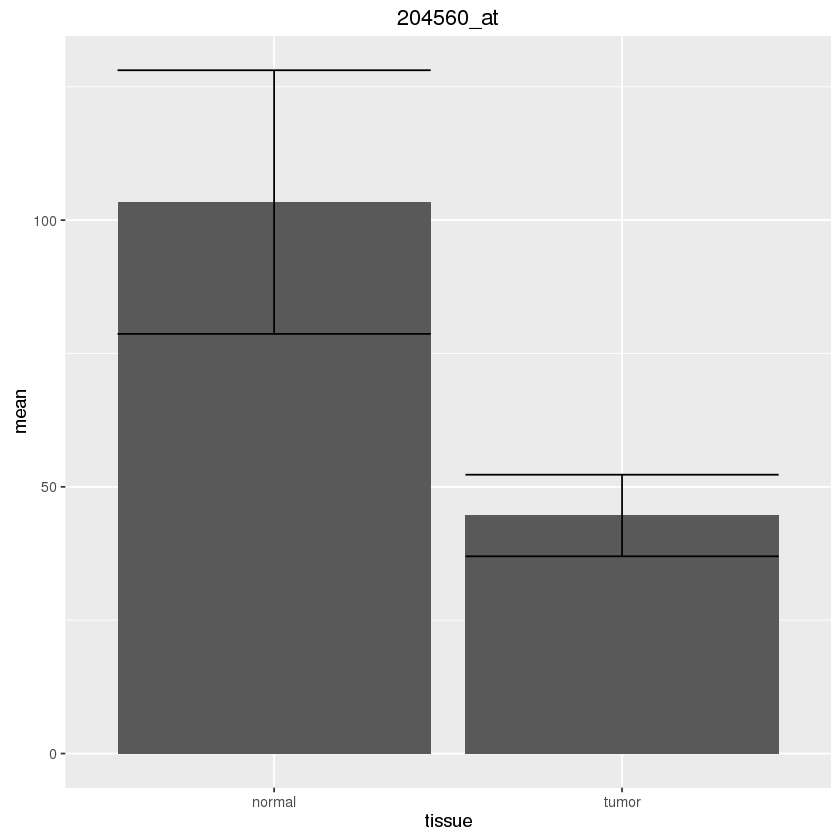

In [77]:
ggplot(selectedDatDFSummarized,aes(x=tissue,y=mean)) + 
  geom_bar(stat="identity") +
  geom_errorbar(aes(ymin=mean-sem, ymax=mean+sem)) +
  ggtitle(probeID) 

Now, let's put all the code we've worked about above in a `for` loop so we can easily generate charts for all the probe sets of interest.

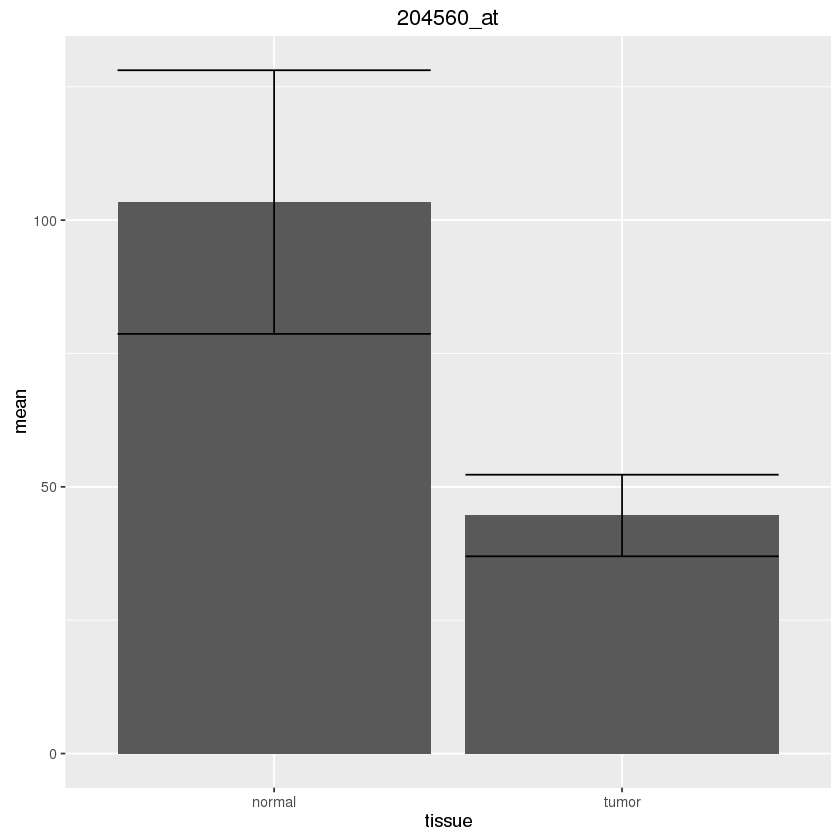

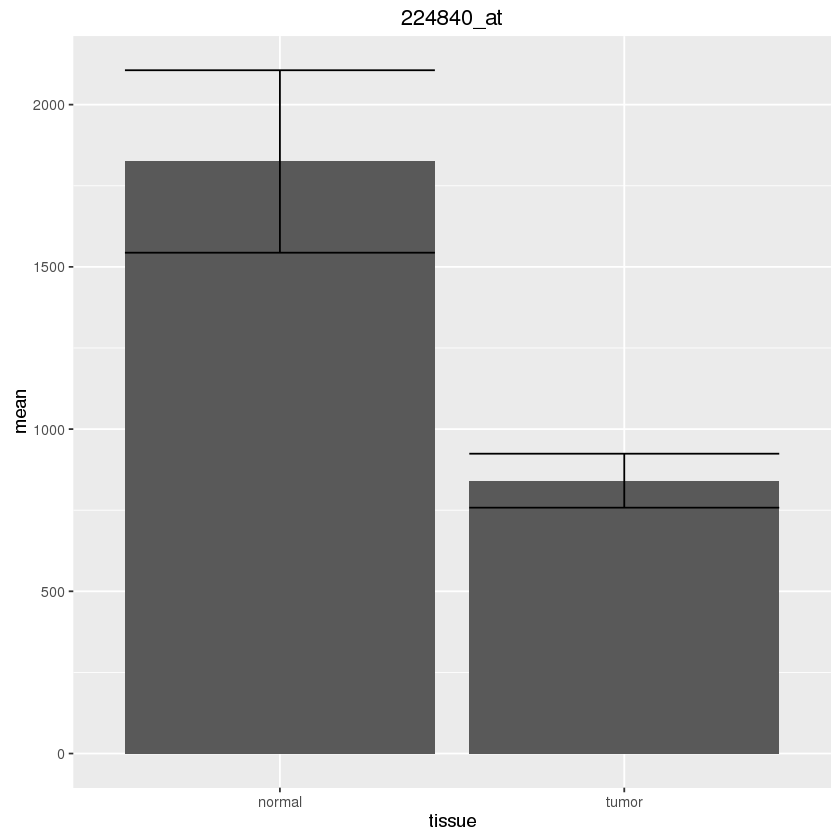

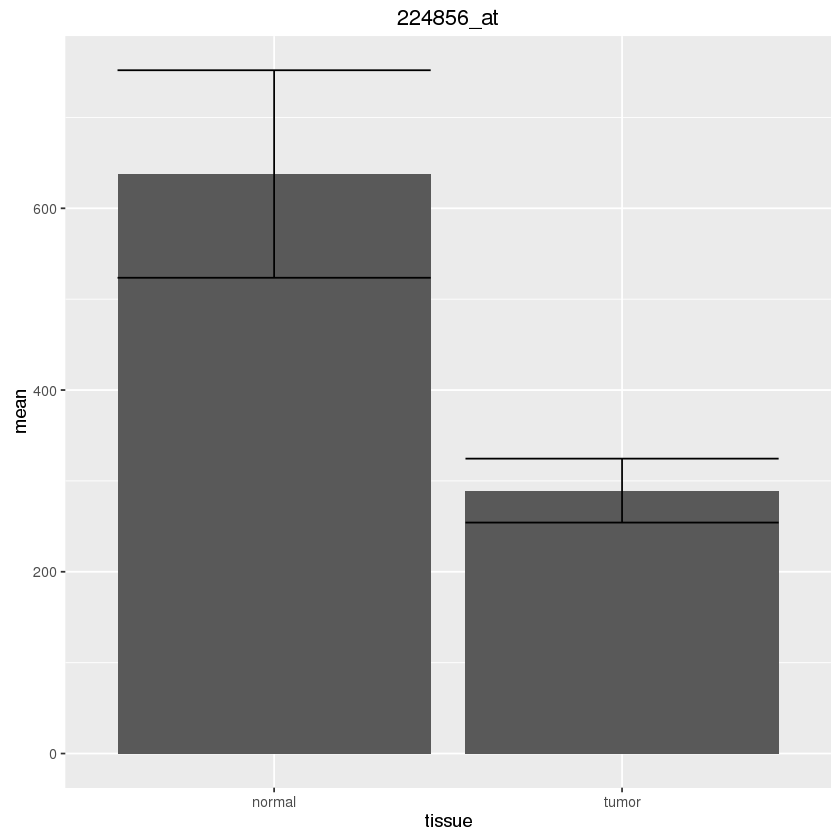

In [78]:
for( i in 1:dim(selectedDat)[1] ) {
  probeID <- rownames(selectedDat)[i]
  selectedDatDF <- data.frame(idx=1:(dim(selectedDat)[2]),exp=selectedDat[i,])
  selectedDatDF$tissue <- pData(eset)$tissue

  grouped = group_by(selectedDatDF,tissue)
  selectedDatDFSummarized <- summarize(grouped, mean=mean(exp), sd=sd(exp), n=length(exp))
  selectedDatDFSummarized$sem <- selectedDatDFSummarized$sd/sqrt(selectedDatDFSummarized$n)
  print(
      ggplot(selectedDatDFSummarized,aes(x=tissue,y=mean)) + 
        geom_bar(stat="identity") +
        geom_errorbar(aes(ymin=mean-sem, ymax=mean+sem)) +
        ggtitle(probeID) 
      )
}


Note that the third chart above for `224856_at` appears to be very similar to Figure 4D in the paper:

<img src="https://www.dropbox.com/s/zxqe52nt7h5uomf/2016-03-23_15-58-42.jpg?dl=1">
![Figure 4D](http://www.ncbi.nlm.nih.gov/core/lw/2.0/html/tileshop_pmc/tileshop_pmc_inline.html?p=PMC3&id=2755578_nihms136361f4.jpg)

### 4.4 Dot plots

Since there really aren't that many data points here, another way to visualize these data is a dot plot

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


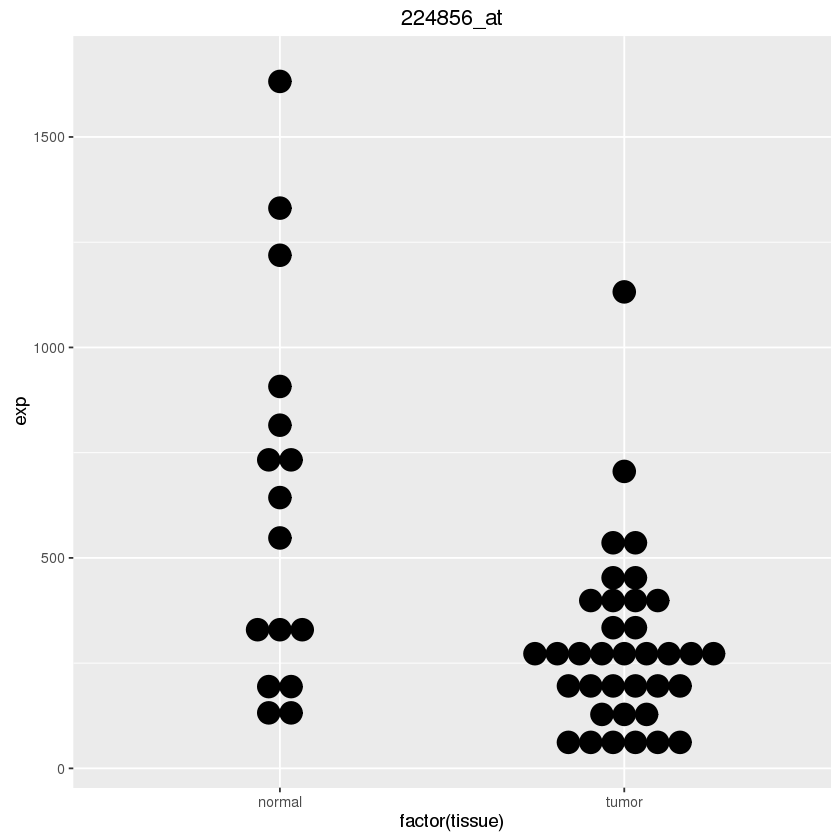

In [79]:
ggplot(selectedDatDF,aes(x=factor(tissue),y=exp)) + 
  geom_dotplot(binaxis="y",stackdir = "center") +
  ggtitle(probeID) 

## 5 Exploratory data analysis

Excerpted from http://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm: 

> Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis 
> that employs a variety of techniques (mostly graphical) to
> 
> * maximize insight into a data set;
> * uncover underlying structure;
> * extract important variables;
> * detect outliers and anomalies;
> * test underlying assumptions;
> * develop parsimonious models; and
> * determine optimal factor settings.

Here, we will use several analysis and visualizations to explore this data set in an unbiased fashion.

### 5.1 Checking normalization

In [80]:
sessionInfo()


R version 3.2.3 (2015-12-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS release 6.7 (Final)

locale:
 [1] LC_CTYPE=en_US.utf8       LC_NUMERIC=C             
 [3] LC_TIME=en_US.utf8        LC_COLLATE=en_US.utf8    
 [5] LC_MONETARY=en_US.utf8    LC_MESSAGES=en_US.utf8   
 [7] LC_PAPER=en_US.utf8       LC_NAME=C                
 [9] LC_ADDRESS=C              LC_TELEPHONE=C           
[11] LC_MEASUREMENT=en_US.utf8 LC_IDENTIFICATION=C      

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] mygene_1.6.0            GenomicFeatures_1.22.13 AnnotationDbi_1.32.3   
 [4] GenomicRanges_1.22.4    GenomeInfoDb_1.6.3      IRanges_2.4.8          
 [7] S4Vectors_0.8.11        BiocInstaller_1.20.1    dplyr_0.4.3            
[10] ggplot2_2.1.0           GEOquery_2.36.0         Biobase_2.30.0         
[13] BiocGenerics_0.16.1    

loaded via a namespace (and not attached):
 [1] Rcpp